<a href="https://colab.research.google.com/github/adipta/ML_C/blob/main/MLC_B6_C1_Project_AdiptaRoy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
inp_Q = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv", encoding='latin-1')


In [ ]:
inp_A = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv", encoding='latin-1')
inp_T = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv", encoding='latin-1')
inp_U = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv", encoding='latin-1')

In [ ]:
inp_Q.head()


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [ ]:
inp_A.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
inp_U.head()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [ ]:
inp_T.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [ ]:
## Assigning Tag to questions 
DataSc_Val=['python', 'r', 'matlab', 'sas', 'excel', 'sql']
inp_QT_DataSc = inp_Q.set_index('Id').join(inp_T.set_index('Id')).query("Tag in ['python', 'r', 'matlab', 'sas', 'excel', 'sql']") ## Finding the Questions that are related to Data Sc
inp_QT_DataSc = inp_QT_DataSc.reset_index()
inp_QT_DataSc.rename(columns={"Id":"QId"}, inplace=True)
inp_QT_DataSc.head()

,QId,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
0,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql
1,1970,116.0,2008-08-05T06:39:31Z,NaN,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,sql
2,2120,383.0,2008-08-05T11:49:11Z,NaN,77,Convert HashBytes to VarChar,<p>I want to get the MD5 Hash of a string valu...,sql
3,2840,383.0,2008-08-05T20:57:00Z,NaN,32,Paging SQL Server 2005 Results,<p>How do I page results in SQL Server 2005?</...,sql
4,4110,369.0,2008-08-06T23:19:50Z,2014-12-30T11:43:01Z,7,What program can I use to generate diagrams of...,<p>I've been tasked with redesigning part of a...,sql


In [ ]:
inp_U_tmp = inp_U.drop(["Unnamed: 0", "creation_date", "last_access_date"], axis=1) ## Dropping the columns not needed 
inp_U_tmp.head()


,id,display_name,reputation,up_votes,down_votes,views
0,26,Shawn,11820,565,67,3547
1,26,Shawn,11820,565,67,3547
2,26,Shawn,11820,565,67,3547
3,26,Shawn,11820,565,67,3547
4,26,Shawn,11820,565,67,3547


In [ ]:
inp_U_tmp.count()

id              1990480
display_name    1990344
reputation      1990480
up_votes        1990480
down_votes      1990480
views           1990480
dtype: int64

In [ ]:
inp_Uunq = inp_U_tmp.drop_duplicates()   ## Dropping duplicates

In [ ]:
inp_Uunq.head(-1000) ## Unique user list

,id,display_name,reputation,up_votes,down_votes,views
0,26,Shawn,11820,565,67,3547
27,1109,Theo,116072,457,136,6905
85,364174,stats,325,25,1,60
87,61,Bernard,22779,1321,219,1731
97,20709,Black Horus,978,73,2,96
...,...,...,...,...,...,...
1989318,5126479,Engineer,191,12,0,23
1989319,2715327,Samir Nabil,222,25,0,33
1989320,6794918,Yash ajabiya,126,3,0,41
1989325,6919126,TrumpSavesLives,6,0,0,6


In [ ]:
inp_Uunq.count()

id              465460
display_name    465436
reputation      465460
up_votes        465460
down_votes      465460
views           465460
dtype: int64

In [ ]:
inp_QTU_DataSc = pd.merge(left=inp_QT_DataSc,right=inp_Uunq, how='left', left_on='OwnerUserId', right_on='id') ## Merging the data of users to the Question-Tag merged dataset


In [ ]:
inp_QTU_DataSc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133660 entries, 0 to 133659
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   QId           133660 non-null  int64  
 1   OwnerUserId   132280 non-null  float64
 2   CreationDate  133660 non-null  object 
 3   ClosedDate    7063 non-null    object 
 4   Score         133660 non-null  int64  
 5   Title         133660 non-null  object 
 6   Body          133660 non-null  object 
 7   Tag           133660 non-null  object 
 8   id            53617 non-null   float64
 9   display_name  53608 non-null   object 
 10  reputation    53617 non-null   float64
 11  up_votes      53617 non-null   float64
 12  down_votes    53617 non-null   float64
 13  views         53617 non-null   float64
dtypes: float64(6), int64(2), object(6)
memory usage: 15.3+ MB


In [ ]:
inp_QTU_DataSc.head(2)

,QId,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag,id,display_name,reputation,up_votes,down_votes,views
0,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql,83.0,Zack Peterson,31853.0,1966.0,63.0,2886.0
1,1970,116.0,2008-08-05T06:39:31Z,NaN,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,sql,116.0,Mark Harrison,181436.0,2537.0,39.0,19386.0


In [ ]:
inp_QTU_DataSc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133660 entries, 0 to 133659
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   QId           133660 non-null  int64  
 1   OwnerUserId   132280 non-null  float64
 2   CreationDate  133660 non-null  object 
 3   ClosedDate    7063 non-null    object 
 4   Score         133660 non-null  int64  
 5   Title         133660 non-null  object 
 6   Body          133660 non-null  object 
 7   Tag           133660 non-null  object 
 8   id            53617 non-null   float64
 9   display_name  53608 non-null   object 
 10  reputation    53617 non-null   float64
 11  up_votes      53617 non-null   float64
 12  down_votes    53617 non-null   float64
 13  views         53617 non-null   float64
dtypes: float64(6), int64(2), object(6)
memory usage: 15.3+ MB


In [ ]:
DataSc_Usr = inp_QTU_DataSc.groupby('Tag').apply(lambda x: list(x['display_name'])).reset_index() ## Getting the relevant user list created from the merged dataframe based on the Tag

In [ ]:
type(DataSc_Usr)

pandas.core.frame.DataFrame

In [ ]:
DataSc_Usr.rename(columns = {0:'UserName'}, inplace=True) ## Renaming the column so this DF can be used to find the users relavant to the tag.
DataSc_Usr

,Tag,UserName
0,excel,"[nan, JonnyGold, Lipis, nan, Jon Cahill, Oli, ..."
1,matlab,"[mana, nan, nan, nan, Jon Norton, Kip, bastibe..."
2,python,"[jkp, PabloG, dbr, jeremiahd, Tyler, Sam McAfe..."
3,r,"[Quamis, nan, nan, Christopher DuBois, Lauryna..."
4,sas,"[nan, Jay Stevens, CuppM, Allan Bowe, l--'''''..."
5,sql,"[Zack Peterson, Mark Harrison, GateKiller, Gat..."


In [ ]:
#### Stack Overflow should come up with the expected approximate time to get it answered.

inp_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Id            int64  
 1   OwnerUserId   float64
 2   CreationDate  object 
 3   ParentId      int64  
 4   Score         int64  
 5   Body          object 
dtypes: float64(1), int64(3), object(2)
memory usage: 92.2+ MB


In [ ]:
inp_A.count()

Id              2014516
OwnerUserId     2001316
CreationDate    2014516
ParentId        2014516
Score           2014516
Body            2014516
dtype: int64

In [ ]:
## Get the minimum Creation Date based on the ParentId
inp_A['CreationDate_R'] = pd.to_datetime(inp_A['CreationDate'])
inp_A.drop(['CreationDate'], axis=1, inplace=True)
inp_A.head()

,Id,OwnerUserId,ParentId,Score,Body,CreationDate_R
0,92,61.0,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",2008-08-01 14:45:37+00:00
1,124,26.0,80,12,<p>I wound up using this. It is a kind of a ha...,2008-08-01 16:09:47+00:00
2,199,50.0,180,1,<p>I've read somewhere the human eye can't dis...,2008-08-01 19:36:46+00:00
3,269,91.0,260,4,"<p>Yes, I thought about that, but I soon figur...",2008-08-01 23:49:57+00:00
4,307,49.0,260,28,"<p><a href=""http://www.codeproject.com/Article...",2008-08-02 01:49:46+00:00


In [ ]:
inp_A_Min=inp_A.groupby('ParentId').apply(lambda x: np.min(x['CreationDate_R'])).reset_index() ## Create data frame with the first response against each of the Question

In [ ]:
inp_A_Min.rename(columns = {0:'First Response'}, inplace=True) 
inp_A_Min.head()

,ParentId,First Response
0,80,2008-08-01 16:09:47+00:00
1,90,2008-08-01 14:45:37+00:00
2,120,2008-09-23 22:41:11+00:00
3,180,2008-08-01 19:36:46+00:00
4,260,2008-08-01 23:49:57+00:00


In [ ]:
inp_QTA_DataSc = pd.merge(left=inp_QT_DataSc,right=inp_A_Min, how='left', left_on='QId', right_on='ParentId') ## Merging the Answer data to the Question-Tag merged dataset

In [ ]:
inp_QTA_DataSc.head(2)

,QId,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag,ParentId,First Response
0,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql,120.0,2008-09-23 22:41:11+00:00
1,1970,116.0,2008-08-05T06:39:31Z,NaN,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,sql,1970.0,2008-08-05 06:43:30+00:00


In [ ]:
#Converting to Datetime from object type 
inp_QTA_DataSc['CreationDate_Q'] = pd.to_datetime(inp_QTA_DataSc['CreationDate'])


In [ ]:
#Converting to Datetime from object type
inp_QTA_DataSc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133660 entries, 0 to 133659
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   QId             133660 non-null  int64              
 1   OwnerUserId     132280 non-null  float64            
 2   CreationDate    133660 non-null  object             
 3   ClosedDate      7063 non-null    object             
 4   Score           133660 non-null  int64              
 5   Title           133660 non-null  object             
 6   Body            133660 non-null  object             
 7   Tag             133660 non-null  object             
 8   ParentId        118882 non-null  float64            
 9   First Response  118882 non-null  datetime64[ns, UTC]
 10  CreationDate_Q  133660 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(2), int64(2), object(5)
memory usage: 12.2+ MB


In [ ]:
#Dropping redundant columns
inp_QTA_DataSc.drop(['CreationDate'], axis=1,inplace=True)
inp_QTA_DataSc.head()

,QId,OwnerUserId,ClosedDate,Score,Title,Body,Tag,ParentId,First Response,CreationDate_Q
0,120,83.0,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql,120.0,2008-09-23 22:41:11+00:00,2008-08-01 15:50:08+00:00
1,1970,116.0,NaN,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,sql,1970.0,2008-08-05 06:43:30+00:00,2008-08-05 06:39:31+00:00
2,2120,383.0,NaN,77,Convert HashBytes to VarChar,<p>I want to get the MD5 Hash of a string valu...,sql,2120.0,2008-08-05 14:26:41+00:00,2008-08-05 11:49:11+00:00
3,2840,383.0,NaN,32,Paging SQL Server 2005 Results,<p>How do I page results in SQL Server 2005?</...,sql,2840.0,2008-08-05 20:59:21+00:00,2008-08-05 20:57:00+00:00
4,4110,369.0,2014-12-30T11:43:01Z,7,What program can I use to generate diagrams of...,<p>I've been tasked with redesigning part of a...,sql,4110.0,2008-08-06 23:29:21+00:00,2008-08-06 23:19:50+00:00


In [ ]:
DataSc_Resp = inp_QTA_DataSc.groupby('Tag').apply(lambda x : np.mean(x['First Response']-x['CreationDate_Q'])).reset_index() ## Calculating mean of response time and capturing into a DF for giving a prediction to the user


In [ ]:
DataSc_Resp.rename(columns = {0:'Average Response Duration'}, inplace=True) ## Renaming the Column head
DataSc_Resp    ## This df is to guide the average response time for a category of question

,Tag,Average Response Duration
0,excel,9 days 18:26:27.099932401
1,matlab,8 days 03:13:07.852680989
2,python,8 days 21:06:52.760695143
3,r,8 days 17:52:17.081394471
4,sas,4 days 10:16:54.291277258
5,sql,3 days 16:36:53.321271016


In [ ]:
DataSc_Usr_Resp = pd.merge(left=DataSc_Usr,right = DataSc_Resp, how='left', left_on='Tag', right_on='Tag')


In [ ]:
DataSc_Usr_Resp ## Merged DF for relevant user group and Response time. 

,Tag,UserName,Average Response Duration
0,excel,"[nan, JonnyGold, Lipis, nan, Jon Cahill, Oli, ...",9 days 18:26:27.099932401
1,matlab,"[mana, nan, nan, nan, Jon Norton, Kip, bastibe...",8 days 03:13:07.852680989
2,python,"[jkp, PabloG, dbr, jeremiahd, Tyler, Sam McAfe...",8 days 21:06:52.760695143
3,r,"[Quamis, nan, nan, Christopher DuBois, Lauryna...",8 days 17:52:17.081394471
4,sas,"[nan, Jay Stevens, CuppM, Allan Bowe, l--'''''...",4 days 10:16:54.291277258
5,sql,"[Zack Peterson, Mark Harrison, GateKiller, Gat...",3 days 16:36:53.321271016


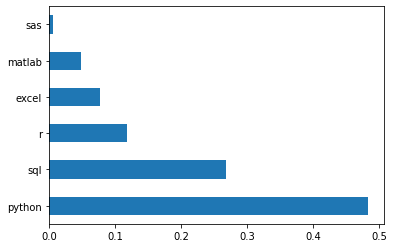

In [ ]:
## Univariate Analysis
inp_QTA_DataSc.Tag.value_counts(normalize=True).plot.barh()
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


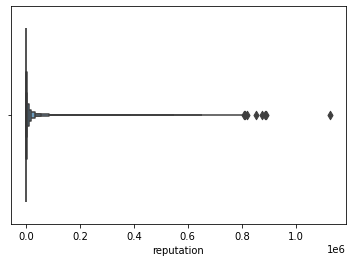

In [ ]:
#### Finding Outliers.
sns.boxenplot(inp_Uunq.reputation)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


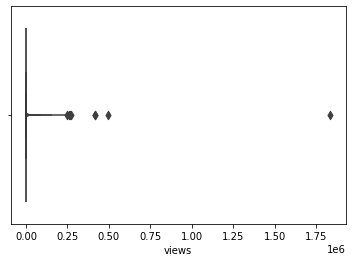

In [ ]:
sns.boxenplot(inp_Uunq.views)
plt.show()

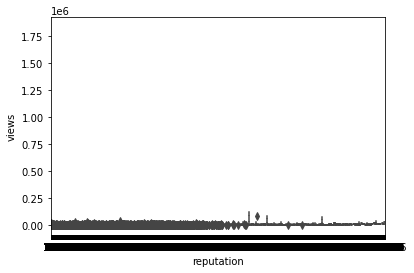

In [ ]:
#Reputation vs. View box plot - bi variate

sns.boxplot(data=inp_Uunq, x="reputation", y="views")
plt.show()

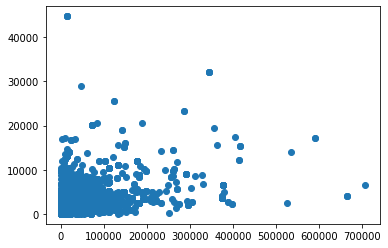

In [ ]:
## Scatter diagram to find relation between reputation and up_votes
plt.scatter(inp_QTU_DataSc.reputation, inp_QTU_DataSc.up_votes)
plt.show()

In [ ]:
#plot the pair plot of reputation, views and up_votes in inp_Uunq dataframe.
#sns.pairplot(data=inp_Uunq, vars=("reputation","views","up_votes"))
#plt.show()

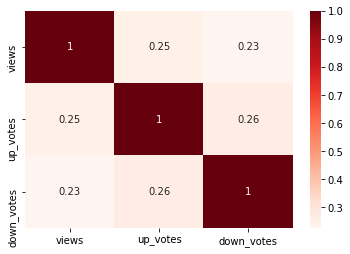

In [ ]:
## plot the correlation matrix of views, up_votes and down_votes in inp1 dataframe.
inp_Uunq[["views","up_votes","down_votes"]].corr()
sns.heatmap(inp_Uunq[["views","up_votes","down_votes"]].corr(), annot=True, cmap="Reds")